# 07wk-028: 선형모형의 적

최규빈  
2023-10-17

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xzU9SK7N9KSAMxLVLTqtTu&si=OFhnv1gcYHsJ1c9F>

# 2. Imports

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.linear_model
import sklearn.preprocessing

# 3. 선형모형의 적

## A. 결측치의 존재

`-` 문제: 데이터에서 누락된 값이 있는 경우, 선형모델이 돌아가지 않음.
(“`NaN이 있어서 모형을 적합할 수 없습니다`”라는 에러 발생)

`-` 해결방법

-   방법1: 결측치를 제거
    1.  결측치가 포함된 열을 제거
    2.  결측치가 포함된 행을 제거
    3.  위의 두 방법을 혼합
-   방법2: 결측치를 impute
    1.  train 에서는 fit_transform, test 에서는 transform
    2.  train, test에서 모두 fit_transform
    3.  임의의 값 (예를들면 -999)로 일괄 impute
    4.  interploation (이미지나 시계열 자료)

## B. 다중공선성의 존재

`-` 문제: 데이터의 설명변수가 역할이 겹칠경우 선형모형의 일반화 성능이
좋지 않음.

`-` 해결방법

-   방법1: 변수제거
    1.  X의 corr을 파악하고 (혹은 히트맵을 그리고) 느낌적으로 제거
    2.  PCA등 차원축소기법을 이용한 제거
-   방법2: 공선성을 가지는 변수를 모아 새로운 변수로 변환
    1.  느낌적으로 변환 (예시 Fsize = Sibsp + Parch + 1, 이후 Sibsp,
        Parch 는 drop)
    2.  PCA를 이용한 변환
-   방법3: Ridge, Lasso 등 패널티계열을 사용
    1.  Rigde
    2.  Lasso
    3.  Elastic net

`-` 방법1-1 (X의 corr을 파악하고 느낌적으로 제거) 의 예시

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
X = df.loc[:,'gpa':'toeic2']
X

*corr 조사*

In [55]:
X.corr()

*heatmap 플랏*

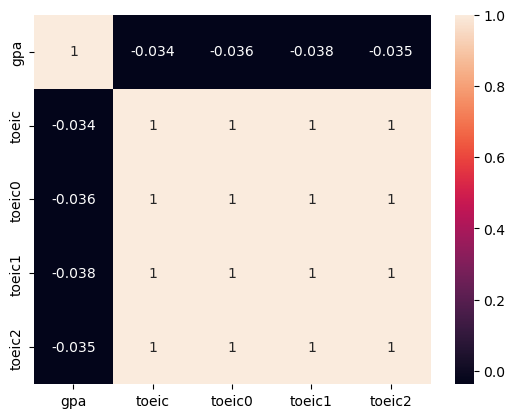

In [57]:
sns.heatmap(X.corr(),annot=True)

## C. 관련이 없는 변수의 존재

`-` 문제: 데이터에서 불필요한 설명변수가 너무 많을 경우 선형모형의
일반화 성능이 좋지 않음.

-   불필요한 설명변수임의 쉬운 예시: 고객이름, ID, Index 관련 변수

`-` 해결방법

-   방법1: 변수제거
    1.  (y,X)의 corr을 파악하고 (혹은 히트맵을 그리고) 느낌적으로 제거
    2.  PCA를 이용한 제거
    3.  Lasso를 이용한 제거
-   방법2: 더 많은 데이터를 확보 (궁극기술, 그런데 차원의 저주때문에
    힘듬)

`-` 방법1-1의 예시

In [59]:
np.random.seed(1)
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
df_balance = pd.DataFrame((np.random.randn(500,3)).reshape(500,3)*1,columns = ['balance'+str(i) for i in range(3)])
df_train = pd.concat([df,df_balance],axis=1)
df_train

In [61]:
df_train.corr()

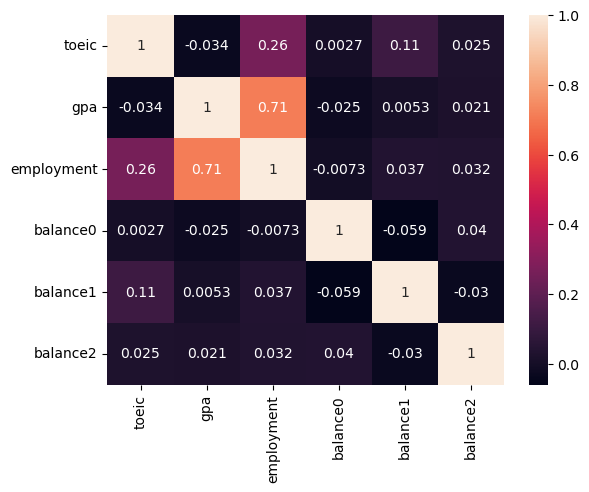

In [63]:
sns.heatmap(df_train.corr(),annot=True)

1.  설명변수 balance0,1,2(=X3,X4,X5)는 반응변수 employment(=y)와 관련이
    없어 -\> X3,X4,X5는 제외하자.
2.  반응변수 employment(=y)와 관련이 있는 설명변수인 toiec,gpa
    (=X1,X2)는 남기자.
3.  공선성체크: 설명변수 toeic, gpa (=X1,X2)의 corr은 -0.034 로 높지
    않으니 다중공선성문제를 걱정할 필요가 없음.

`-` 방법1-3의 예시

In [66]:
np.random.seed(1)
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
df_balance = pd.DataFrame((np.random.randn(500,3)).reshape(500,3)*1,columns = ['balance'+str(i) for i in range(3)])
df_train = pd.concat([df,df_balance],axis=1)
df_train

In [86]:
# step1
X,y = df_train[['toeic','gpa','balance0','balance1','balance2']], df_train['employment']
# step2 
predictr = sklearn.linear_model.LogisticRegressionCV(
    Cs = [0.1, 1, 10, 100],
    penalty='l1',
    solver='liblinear',
    random_state=42
)
# step3 
predictr.fit(X,y)
# step4 -- pass

In [87]:
predictr.coef_

In [88]:
s = pd.Series(predictr.coef_.reshape(-1))
s.index= X.columns
s

## D. 이상치의 존재

`-` 문제: 이상치가 존재할 경우 전체 모형이 무너질 수 있음

`-` 이상치가 있을 경우 해결할 수 있는 방법

-   방법1: 이상치를 제거하고 분석한다.
    1.  느낌적으로 제거함.
    2.  이상치를 감지하는 지표을 사용하여 제거한 이후 분석
    3.  이상치를 자동으로 감지하는 모형을 사용하여 이상치를 제거한 이후
        분석
-   방법2: 로버스트 선형회귀 계열을 이용
    1.  `sklearn.linear_model.HuberRegressor` 등  
-   방법3: 이상치를 완화시키는 변환을 사용
    1.  `sklearn.preprocessing.PowerTransformer` 이용

`-` 방법3-1의 예시

In [89]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:100,3].to_numpy()
temp.sort()
ice_sales = 10 + temp * 0.5 + np.random.randn(100)
ice_sales[0] = 50
df_train = pd.DataFrame({'temp':temp,'ice_sales':ice_sales})[:10]
df_train

In [95]:
transformr = sklearn.preprocessing.PowerTransformer()
x,y = transformr.fit_transform(df_train).T

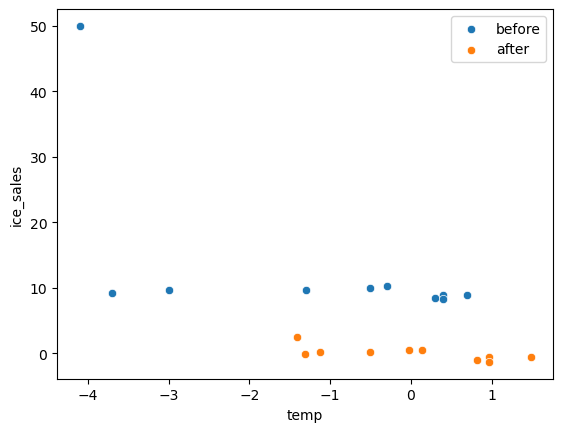

In [99]:
sns.scatterplot(df_train,x='temp',y='ice_sales',label='before')
sns.scatterplot(x=x,y=y,label='after')

—참고—

`PowerTransformer()`는 자료가 정규분포가 아닌 경우 강제로 정규화하는
변환이다.

In [104]:
x = np.random.exponential(scale=10, size=1000)
transformr = sklearn.preprocessing.PowerTransformer(method='box-cox')  # 'box-cox' 또는 'yeo-johnson' 중 선택 가능, 디폴트는 이오존슨
y = transformr.fit_transform(x.reshape(-1, 1))

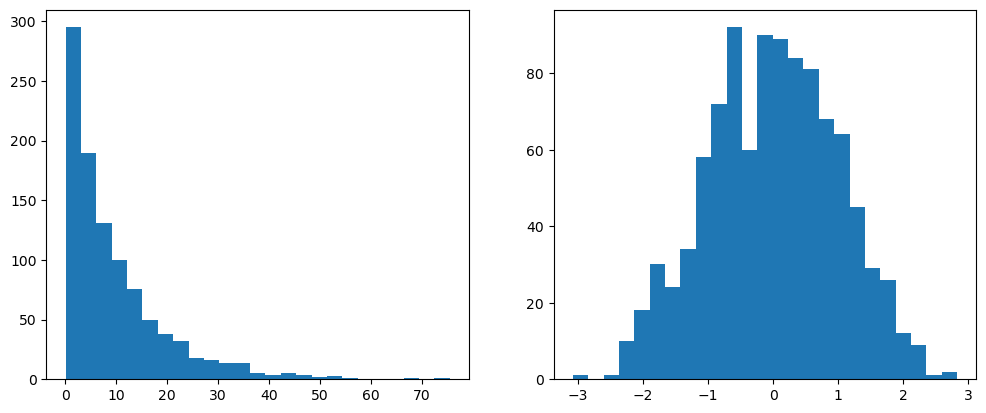

In [105]:
fig, ax = plt.subplots(1,2)
ax[0].hist(x,bins=25)
ax[1].hist(y,bins=25)
fig.set_figwidth(12)

## E. 교호작용의 존재

`-` 문제: 설명 변수 간의 상호 작용이 있는 경우 이를 고려하지 않으면
모델이 데이터를 잘 설명하지 못할 수 있음.

`-` 해결: 고려하면 됩니당..